In [1]:
import pandas as pd
import numpy as np

In [2]:
positives=pd.read_csv("C:/Users/prath/Downloads/positive-word.txt",sep='\t',engine='python')

In [3]:
positives=positives.rename({"a+": "words"},axis=1)
positives['values']="+1"
positives

,words,values
0,abound,+1
1,abounds,+1
2,abundance,+1
3,abundant,+1
4,accessable,+1
...,...,...
2000,youthful,+1
2001,zeal,+1
2002,zenith,+1
2003,zest,+1


In [4]:
negatives=pd.read_csv("C:/Users/prath/Downloads/negative-word.txt",sep='\t',engine='python')

In [5]:
negatives=negatives.rename({"2-faced": "words"},axis=1)
negatives['values']="-1"
negatives

,words,values
0,2-faces,-1
1,abnormal,-1
2,abolish,-1
3,abominable,-1
4,abominably,-1
...,...,...
4777,zaps,-1
4778,zealot,-1
4779,zealous,-1
4780,zealously,-1


In [6]:
new_data=pd.merge(positives,negatives,on=["words","values"],how="outer")
new_data.fillna(r'-', axis=1)

,words,values
0,abound,+1
1,abounds,+1
2,abundance,+1
3,abundant,+1
4,accessable,+1
...,...,...
6782,zaps,-1
6783,zealot,-1
6784,zealous,-1
6785,zealously,-1


In [7]:
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable,n))

In [8]:
scores=new_data.set_index('words')['values'].to_dict()
take(20,scores.items())

[('abound', '+1'),
 ('abounds', '+1'),
 ('abundance', '+1'),
 ('abundant', '+1'),
 ('accessable', '+1'),
 ('accessible', '+1'),
 ('acclaim', '+1'),
 ('acclaimed', '+1'),
 ('acclamation', '+1'),
 ('accolade', '+1'),
 ('accolades', '+1'),
 ('accommodative', '+1'),
 ('accomodative', '+1'),
 ('accomplish', '+1'),
 ('accomplished', '+1'),
 ('accomplishment', '+1'),
 ('accomplishments', '+1'),
 ('accurate', '+1'),
 ('accurately', '+1'),
 ('achievable', '+1')]

## Tokenization

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import string
import spacy

In [11]:
data=pd.read_csv("C:/Users/prath/Downloads/Elonmusk.csv",sep='\t',engine='python')

In [12]:
data

,",Text"
0,"1,@kunalb11 I’m an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."
...,...
2076,"1995,""@flcnhvy True, it sounds so surreal, but..."
2077,"1996,@PPathole Make sure to read ur terms &amp..."
2078,"1997,@TeslaGong @PPathole Samwise Gamgee"
2079,"1998,@PPathole Altho Dumb and Dumber is <U+000..."


In [13]:
data=data.rename({",Text":"text"},axis=1)
data

,text
0,"1,@kunalb11 I’m an alien"
1,"2,@ID_AA_Carmack Ray tracing on Cyberpunk with..."
2,"3,@joerogan @Spotify Great interview!"
3,"4,@gtera27 Doge is underestimated"
4,"5,@teslacn Congratulations Tesla China for ama..."
...,...
2076,"1995,""@flcnhvy True, it sounds so surreal, but..."
2077,"1996,@PPathole Make sure to read ur terms &amp..."
2078,"1997,@TeslaGong @PPathole Samwise Gamgee"
2079,"1998,@PPathole Altho Dumb and Dumber is <U+000..."


In [14]:
data=[text.strip() for text in data.text]
data=[text for text in data if text]
data

['1,@kunalb11 I’m an alien',
 '2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '3,@joerogan @Spotify Great interview!',
 '4,@gtera27 Doge is underestimated',
 '5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 '6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 '7,"Frodo was the underdoge,',
 'All thought he would fail,',
 'Himself most of all. https://t.co/zGxJFDzzrM"',
 '8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '9,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 '10,The most entertaining outcome is the most likely',
 '11,@GiveDirectly Just sent some',
 '12,Just agree to do Clubhouse with @kanyewest',
 '13,https://t.co/3rWE9uHSTS',
 '14,@geoffkeighley @UnrealEngine It’s getting real',
 '15,"Bought some Dogecoin for lil X, so he can be a toddler hodler"',
 '16,"@JoshManMode He definitely has issues, but the sentencing seems a bit

In [16]:
Text=' '.join(data)
Text

'1,@kunalb11 I’m an alien 2,@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? 3,@joerogan @Spotify Great interview! 4,@gtera27 Doge is underestimated 5,@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! 6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj 7,"Frodo was the underdoge, All thought he would fail, Himself most of all. https://t.co/zGxJFDzzrM" 8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) 9,@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. 10,The most entertaining outcome is the most likely 11,@GiveDirectly Just sent some 12,Just agree to do Clubhouse with @kanyewest 13,https://t.co/3rWE9uHSTS 14,@geoffkeighley @UnrealEngine It’s getting real 15,"Bought some Dogecoin for lil X, so he can be a toddler hodler" 16,"@JoshManMode He definitely has issues, but the sentencing seems a bit high" 17,@freewalletorg Thanks for fixing 18,@freewalletorg Please u

In [16]:
no_punc_Text=Text.translate(str.maketrans('','',string.punctuation))
no_punc_Text

'1kunalb11 I’m an alien 2IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it 3joerogan Spotify Great interview 4gtera27 Doge is underestimated 5teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more 6Happy New Year of the Ox httpstco9WFKMYu2oj 7Frodo was the underdoge All thought he would fail Himself most of all httpstcozGxJFDzzrM 8OwenSparks flcnhvy anonyx10 Haha thanks  9flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation 10The most entertaining outcome is the most likely 11GiveDirectly Just sent some 12Just agree to do Clubhouse with kanyewest 13httpstco3rWE9uHSTS 14geoffkeighley UnrealEngine It’s getting real 15Bought some Dogecoin for lil X so he can be a toddler hodler 16JoshManMode He definitely has issues but the sentencing seems a bit high 17freewalletorg Thanks for fixing 18freewalletorg Please unlock my account 19AstroJordy U0001F923U0001F923 20This is true power haha htt

In [17]:
pip install --user -U nltk

Requirement already up-to-date: nltk in c:\users\prath\appdata\roaming\python\python38\site-packages (3.6.2)
Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize
Text_tokenize=word_tokenize(no_punc_Text)
Text_tokenize

['1kunalb11',
 'I',
 '’',
 'm',
 'an',
 'alien',
 '2IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 '3joerogan',
 'Spotify',
 'Great',
 'interview',
 '4gtera27',
 'Doge',
 'is',
 'underestimated',
 '5teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '6Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 '7Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 '8OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 '9flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 '10The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 '11GiveDirectly',
 'Just',
 'sent',
 'some',
 '12Just',
 'a

In [20]:
len(Text_tokenize)

21790

In [21]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [22]:
my_stop_words=stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens=[word for word in Text_tokenize if not word in my_stop_words]
print(no_stop_tokens)

['1kunalb11', 'I', '’', 'alien', '2IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', '3joerogan', 'Spotify', 'Great', 'interview', '4gtera27', 'Doge', 'underestimated', '5teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', '6Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', '7Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', '8OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', '9flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', '10The', 'entertaining', 'outcome', 'likely', '11GiveDirectly', 'Just', 'sent', '12Just', 'agree', 'Clubhouse', 'kanyewest', '13httpstco3rWE9uHSTS', '14geoffkeighley', 'UnrealEngine', 'It', '’', 'getting', 'real', '15Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', '16JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', '17freewalletorg', 'Thank

In [23]:
lower_words=[text.lower() for text in no_stop_tokens]
lower_words

['1kunalb11',
 'i',
 '’',
 'alien',
 '2idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 '3joerogan',
 'spotify',
 'great',
 'interview',
 '4gtera27',
 'doge',
 'underestimated',
 '5teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 '6happy',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 '7frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 '8owensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 '9flcnhvy',
 'anonyx10',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 '10the',
 'entertaining',
 'outcome',
 'likely',
 '11givedirectly',
 'just',
 'sent',
 '12just',
 'agree',
 'clubhouse',
 'kanyewest',
 '13httpstco3rwe9uhsts',
 '14geoffkeighley',
 'unrealengine',
 'it',
 '’',
 'getting',
 'real',
 '15bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 '16joshmanmode',
 'he',
 'def

In [24]:
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
stemmed_tokens

['1kunalb11',
 'i',
 '’',
 'alien',
 '2idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 '3joerogan',
 'spotifi',
 'great',
 'interview',
 '4gtera27',
 'doge',
 'underestim',
 '5teslacn',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 '6happi',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 '7frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 '8owenspark',
 'flcnhvi',
 'anonyx10',
 'haha',
 'thank',
 '9flcnhvi',
 'anonyx10',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 '10the',
 'entertain',
 'outcom',
 'like',
 '11givedirectli',
 'just',
 'sent',
 '12just',
 'agre',
 'clubhous',
 'kanyewest',
 '13httpstco3rwe9uhst',
 '14geoffkeighley',
 'unrealengin',
 'it',
 '’',
 'get',
 'real',
 '15bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 '16joshmanmod',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high'

In [25]:
!python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-07-13 14:12:28.848554: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-07-13 14:12:28.848591: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [26]:
nlp = spacy.load("en_core_web_sm")

In [27]:
doc=nlp(' '.join(no_stop_tokens))
doc

1kunalb11 I ’ alien 2IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried 3joerogan Spotify Great interview 4gtera27 Doge underestimated 5teslacn Congratulations Tesla China amazing execution last year Now next even 6Happy New Year Ox httpstco9WFKMYu2oj 7Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM 8OwenSparks flcnhvy anonyx10 Haha thanks 9flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation 10The entertaining outcome likely 11GiveDirectly Just sent 12Just agree Clubhouse kanyewest 13httpstco3rWE9uHSTS 14geoffkeighley UnrealEngine It ’ getting real 15Bought Dogecoin lil X toddler hodler 16JoshManMode He definitely issues sentencing seems bit high 17freewalletorg Thanks fixing 18freewalletorg Please unlock account 19AstroJordy U0001F923U0001F923 20This true power haha httpstcoFc9uhQSd7O 21freewalletorg Any crypto wallet ’ give private keys avoided costs 22freewalletorg Your app sucks 23RT SpaceX NASA selected Falcon Heavy launch first 

In [28]:
lemmas=[token.lemma_ for token in doc]
lemmas

['1kunalb11',
 'I',
 "'",
 'alien',
 '2IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 '3joerogan',
 'spotify',
 'great',
 'interview',
 '4gtera27',
 'Doge',
 'underestimate',
 '5teslacn',
 'congratulation',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 '6happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 '7frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 '8owensparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thank',
 '9flcnhvy',
 'anonyx10',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 '10The',
 'entertaining',
 'outcome',
 'likely',
 '11givedirectly',
 'just',
 'send',
 '12Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 '13httpstco3rwe9uhsts',
 '14geoffkeighley',
 'UnrealEngine',
 'it',
 "'",
 'get',
 'real',
 '15bought',
 'Dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 '16joshmanmode',
 'he',
 'definitely',
 '

## Sentiment Analysis

In [29]:
sentiment_lexicon=scores
def calculate_sentiment(text: str=None) -> float:
    sent_score=0
    if text:
        text=nlp(text)
        for word in text:
            sent_score = sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [30]:
calculate_sentiment(text='perfect')

'+1'

In [41]:
from nltk import tokenize
text=tokenize.sent_tokenize(" ".join(data))

In [42]:
data1=pd.DataFrame(text, columns=['text'])

In [43]:
data1['sentiment_value']=data1['text'].apply(calculate_sentiment)
data1

,text,sentiment_value
0,"1,@kunalb11 I’m an alien 2,@ID_AA_Carmack Ray ...",0
1,Have you tried it?,0
2,"3,@joerogan @Spotify Great interview!",0
3,"4,@gtera27 Doge is underestimated 5,@teslacn C...",0
4,Now on to the next for even more!!,0
...,...,...
909,"1991,""@kenyanwalstreet Not actually a payout, ...",0
910,"It may never pay out, as the stock can’t b… ht...",0
911,"Details Aug 28.""",0
912,"1993,AI symbiosis while u wait 1994,@vistacrui...",0


In [34]:
data1['word_count']=data1['text'].str.split().apply(len)
data1['word_count']

0      12
1      18
2       8
3       6
4      11
       ..
660    15
661    11
662    30
663     3
664    56
Name: word_count, Length: 665, dtype: int64

In [35]:
data1.sort_values(by='sentiment_value')

,text,sentiment_value,word_count
0,"1,@kunalb11 I’m an alien2,@ID_AA_Carmack Ray t...",0,12
438,Took us four launches to reach orbit.,0,7
439,"Rockets are hard.1318,Many exciting things wil...",0,41
440,"""1321,@flcnhvy <U+0001F1E9><U+0001F1EA> Natürl...",0,10
441,Es wird super Spaß machen!!,0,5
...,...,...,...
223,"You can’t stop playing""725,Shakes fist at entr...",0,19
224,My Thursday night saliva sample came back toda...,0,48
225,Hilarious that he has to clarify that he r… ht...,0,35
227,"Will talk to… https://t.co/K77wXQ11yt""739,Lab ...",0,35


In [36]:
data1['index']=range(0,len(data1))

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

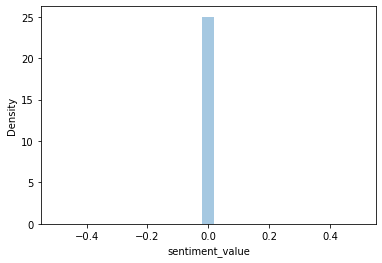

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(data1['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

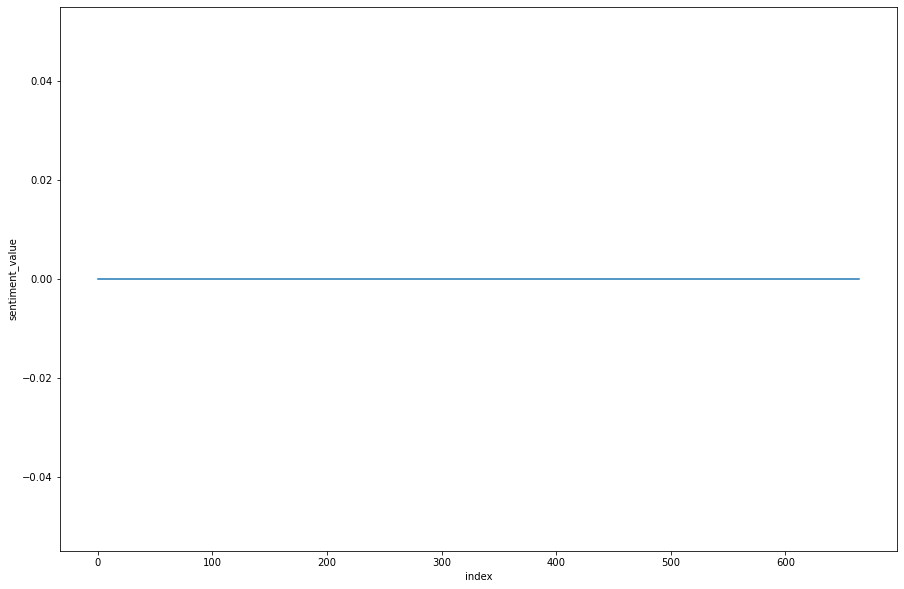

In [38]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=data1)

<AxesSubplot:title={'center':'sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

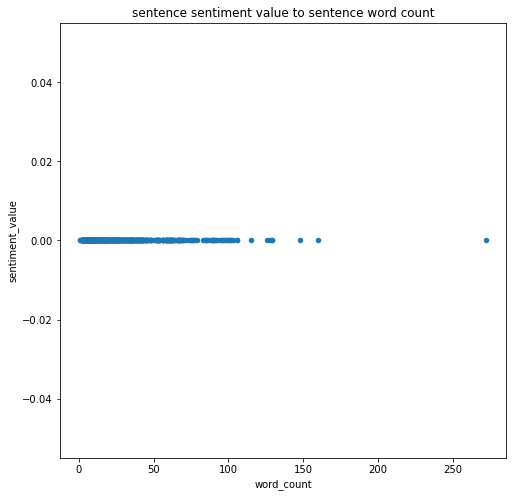

In [39]:
data1.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='sentence sentiment value to sentence word count')